In [3]:
%load_ext autoreload
%autoreload 2
from src.experiments.training_experiments import run_batched_DOE
import pandas as pd
from matplotlib import pyplot as plt

#manual seed torch and numpy
import torch
import numpy as np

seed = 1337
torch.manual_seed(seed)
np.random.seed(seed)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
results = run_batched_DOE()

n_samples: 32768


KeyboardInterrupt: 

In [32]:
# First, let's flatten the structure
flattened_data = []
for sparsity, value_list in results.items():
    for item in value_list:
        # Create a row by combining the sparsity with the inner dictionary
        row = {'sparsity': sparsity}
        row.update({
            'mse': float(item['mse']), 
            'L0': float(item['L0']),
            'L1 lambda': item['L1 lambda']
        })
        flattened_data.append(row)

# Create DataFrame
df = pd.DataFrame(flattened_data)

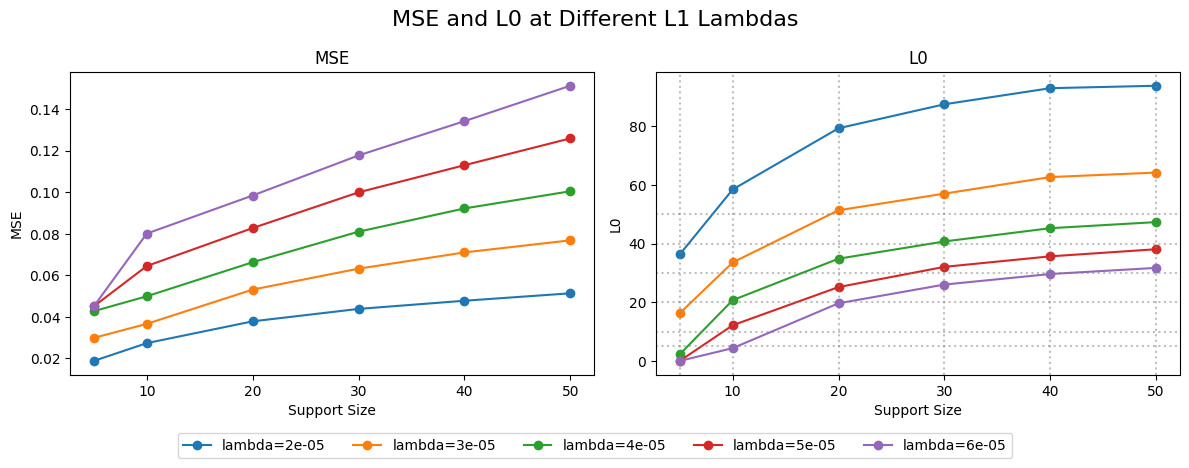

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
lambdas = df['L1 lambda'].unique()

# Create plots
for lam in lambdas:
    sub_df = df[df['L1 lambda'] == lam]
    ax[0].plot(sub_df['sparsity'], sub_df['mse'], marker='o', label=f'lambda={lam}')
    ax[1].plot(sub_df['sparsity'], sub_df['L0'], marker='o')

# Add reference lines for L0 values
l0_values = [5, 10, 20, 30, 40, 50]
for l0 in l0_values:
    # Horizontal line
    ax[1].axhline(y=l0, color='gray', linestyle=':', alpha=0.5)
    # Vertical line
    ax[1].axvline(x=l0, color='gray', linestyle=':', alpha=0.5)

# Add titles and labels
fig.suptitle('MSE and L0 at Different L1 Lambdas', fontsize=16)
ax[0].set_title('MSE')
ax[1].set_title('L0')
ax[0].set_xlabel('Support Size')
ax[1].set_xlabel('Support Size')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('L0')

# Adjust subplot spacing to make room for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Add single legend below both subplots
lines, labels = ax[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, 0),
          ncol=5, borderaxespad=3)

plt.show()